# Learning Gate - Reto: Costo Póliza de Seguro

## Data Science Fundamentals - Statistical Inference

#### ***Resumen Ejecutivo***

### Introduction

Comprar un auto involucra saber qué factores influyen en el precio para poder tomar las
decisiones más adecuadas y hacer rendir el presupuesto.

### Objective

Al realizar el análisis de las variables clave en un problema a resolver:

- Podrás conocer la forma de tomar decisiones de acuerdo con la naturaleza de la variable que estás estudiando, ya sea cuantitativa o categórica, así como el tipo de escala.
- Seleccionarás las herramientas para visualizar medidas estadísticas como:
    - pruebas de hipótesis de un conjunto de dato bidimensionales para describir el Comportamiento de una población
    - nivel de dependencia de las variables.
- Podrás construir un resumen ejecutivo que muestre los comportamientos de las variables importantes en tu análisis

### Instructions

#### Validar supuestos:

Realizar un proceso de análisis similar al realizado en la sección de práctica:
- El monto promedio que una persona paga por su póliza de seguros es menor de $9480 dólares
- Basándote en el índice de masa corporal, detectar si las mujeres cuidan más de su salud.
- El costo de la póliza aumenta conforme la cantidad de hijos del contratante.
- Determinar si existe relación entre el género del contratante y la cantidad de hijos.
- Determinar si existe relación entre el costo de la póliza y si el contratante es fumador o no

### Importing Libraries

In [1]:
import os, math
import pandas as pd
import numpy as np
import scipy as sci
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm, t, f, chi2, chi2_contingency

%matplotlib inline

### Loading Data

In [2]:
path = os.path.join(os.getcwd(), 'Data', 'Insurance-Reto.xlsx')
df = pd.read_excel(path) 
display(df.head())

,Edad del contratante,Género,Indice de masa corporal,Cantidad de hijos,Fumador,Costo Póliza
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,33,male,22.705,0,no,21984.47061
3,32,male,28.880,0,no,3866.85520
4,31,female,25.740,0,no,3756.62160


### ***PASO 1. Clasificar cada una de las variables:***

In [3]:
pd.DataFrame({'Variables':df.columns.tolist(),
              'Cuantitativas':[is_numeric_dtype(df[col]) for col in df.columns],
              'Cualitivativas':[not is_numeric_dtype(df[col]) for col in df.columns],
              'Escala':['Razon', 'Nominal', 'Intervalo', 'Razon', 'Nominal', 'Intervalo']})

,Variables,Cuantitativas,Cualitivativas,Escala
0,Edad del contratante,True,False,Razon
1,Género,False,True,Nominal
2,Indice de masa corporal,True,False,Intervalo
3,Cantidad de hijos,True,False,Razon
4,Fumador,False,True,Nominal
5,Costo Póliza,True,False,Intervalo


# Exploratory Data Analysis

## Descriptive Statistics Analysis

### Statistical Summary

In [4]:
display(df.describe())

,Edad del contratante,Indice de masa corporal,Cantidad de hijos,Costo Póliza
count,1138.000000,1138.000000,1138.000000,1138.000000
mean,38.942882,30.661261,0.706503,13040.970971
std,14.352556,6.155535,0.793538,12191.322806
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4349.725100
50%,39.000000,30.400000,0.000000,9159.350325
75%,51.000000,34.800000,1.000000,16281.596250
max,64.000000,53.130000,2.000000,63770.428010


### Statistical Summary - Grouped Data

In [5]:
df_grp = df.groupby(['Fumador', "Género", 'Cantidad de hijos'])[['Edad del contratante', 'Indice de masa corporal', 'Costo Póliza']].agg(['min', 'max', 'mean', 'count'])
display(df_grp)

Edad del contratante                       \
                                                  min max       mean count   
Fumador Género Cantidad de hijos                                             
no      female 0                                   18  64  38.614407   236   
               1                                   18  63  39.353383   133   
               2                                   18  64  40.783505    97   
        male   0                                   18  64  39.116592   223   
               1                                   18  64  39.392308   130   
               2                                   18  64  37.920455    88   
yes     female 0                                   18  64  37.150943    53   
               1                                   20  64  40.320000    25   
               2                                   19  64  39.318182    22   
        male   0                                   18  64  36.483871    62   
               1                                   18  61  39.444444    36   
               2                                   18  64  39.666667    33   

                                 Indice de masa corporal                     \
                                                     min     max       mean   
Fumador Género Cantidad de hijos                                              
no      female 0                                  17.290  44.745  30.382669   
               1                                  16.815  46.090  30.209361   
               2                                  17.290  48.070  30.969691   
        male   0                                  15.960  53.130  30.731099   
               1                                  17.385  50.380  30.928615   
               2                                  16.815  46.530  30.783580   
yes     female 0                                  20.520  47.410  30.267358   
               1                                  20.235  42.750  29.219000   
               2                                  17.195  47.600  29.239318   
        male   0                                  19.300  44.880  30.779919   
               1                                  19.800  52.580  32.023889   
               2                                  17.290  45.540  32.680758   

                                       Costo Póliza               \
                                 count          min          max   
Fumador Género Cantidad de hijos                                   
no      female 0                   236   1607.51010  28923.13692   
               1                   133   2201.09710  35160.13457   
               2                    97   2801.25880  36910.60803   
        male   0                   223   1121.87390  30259.99556   
               1                   130   1711.02680  30166.61817   
               2                    88   2304.00220  32108.66282   
yes     female 0                    53  13844.50600  63770.42801   
               1                    25  15359.10450  58571.07448   
               2                    22  14455.64405  47305.30500   
        male   0                    62  13747.87235  62592.87309   
               1                    36  16450.89470  51194.55914   
               2                    33  12829.45510  49577.66240   

                                                      
                                          mean count  
Fumador Género Cantidad de hijos                      
no      female 0                   7688.318863   236  
               1                   8758.560884   133  
               2                   9921.777645    97  
        male   0                   7530.806677   223  
               1                   7837.147396   130  
               2                   9020.567024    88  
yes     female 0                  30685.059887    53  
               1                  30264.253915    25  
               2                  31663.833195    

### Understanding Insurance Cost Trends Related to the Customers' Ages

C:\Users\alfde\AppData\Local\Temp\ipykernel_22404\857823211.py:17: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend('Insurance Costs', loc='upper center', title='Costo Promedio de Poliza', labels=['female', 'male']);


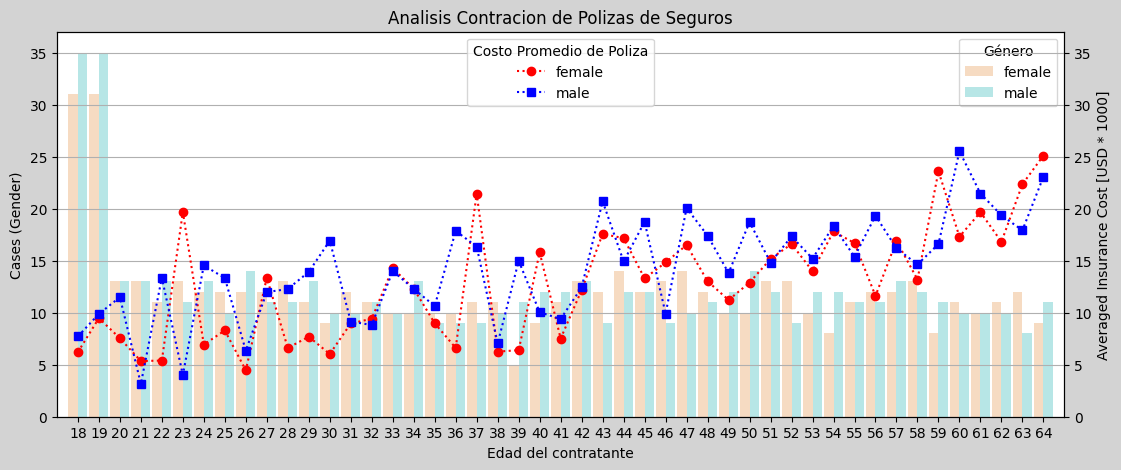

In [6]:
df_analysis = df.groupby(['Género', 'Edad del contratante'])['Costo Póliza'].agg(['count', 'mean']).reset_index()

fig, ax = plt.subplots(1,1, figsize=(13,5), facecolor='lightgray')
plt.title('Analisis Contracion de Polizas de Seguros')
sns.barplot(x="Edad del contratante", y="count", hue="Género", data=df_analysis, width=.9, palette=['peachpuff', 'paleturquoise'], ax=ax)
ax.set_ylim([0,37])
ax.set_ylabel('Cases (Gender)')
ax2 = ax.twinx()
ax2.plot(range(df_analysis[df_analysis["Género"]=='female']['Edad del contratante'].values.shape[0]), 
         df_analysis[df_analysis["Género"]=='female']['mean'].values/1000, color='red', linestyle='dotted', marker='o', label='female')
ax2.plot(range(df_analysis[df_analysis["Género"]=='male']['Edad del contratante'].values.shape[0]), 
         df_analysis[df_analysis["Género"]=='male']['mean'].values/1000, color='blue', linestyle='dotted', marker='s', label='fdfdmale')

ax2.set_ylim([0,37])
ax2.set_ylabel('Averaged Insurance Cost [USD * 1000]')

plt.legend('Insurance Costs', loc='upper center', title='Costo Promedio de Poliza', labels=['female', 'male']);
plt.xlim([-1,47])
plt.grid()

### Understanding IMC effects on the Insurances Clients

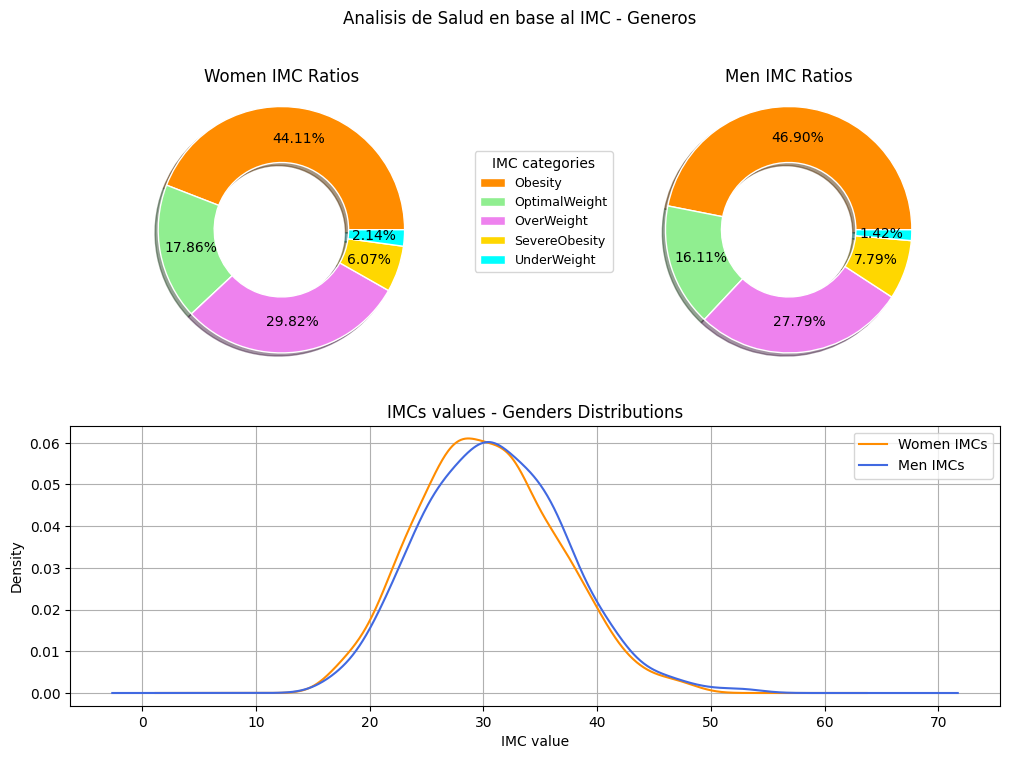

In [7]:
IMC_dict = {'UnderWeight':[0, 18.5], 'OptimalWeight':[18.5, 25], 'OverWeight':[25.1, 30],
            'Obesity':[30.1, 40], 'SevereObesity':[40, 1000]}

def mappingIMC(x, mapa=IMC_dict):
    for key in mapa.keys():
        if (x > mapa[key][0]) & (x <= mapa[key][1]):
            return key


df['IMC'] = df['Indice de masa corporal'].apply(lambda x:mappingIMC(x))     

dfgrp = df.groupby(['Género', 'IMC'])['Indice de masa corporal'].agg(['count'])
dfgrp = dfgrp.reset_index()

plt.figure(figsize=(12, 8))
plt.suptitle('Analisis de Salud en base al IMC - Generos')
size = 0.5
outer_colors = ['darkorange', 'lightgreen','violet','gold', 'cyan']

ax1 = plt.subplot(2,2,1)
ax1.pie(dfgrp[dfgrp['Género']=='female']['count'].values,autopct='%.2f%%',shadow=True, pctdistance=.75, radius=1.1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))
ax1.set_title('Women IMC Ratios')
plt.legend(['Obesity', 'OptimalWeight', 'OverWeight', 'SevereObesity', 'UnderWeight'], fontsize=9, loc=(1.19, .35),title="IMC categories", fancybox=True)

ax2 = plt.subplot(2,2,2)
ax2.pie(dfgrp[dfgrp['Género']=='male']['count'].values,autopct='%.2f%%',shadow=True, pctdistance=.75, radius=1.1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))
ax2.set_title('Men IMC Ratios')

ax4 = plt.subplot(2,1,2)
df[df['Género']=='female']['Indice de masa corporal'].plot.kde(label='Women IMCs', ax=ax4, color='darkorange')
df[df['Género']=='male']['Indice de masa corporal'].plot.kde(label='Men IMCs', ax=ax4, color='royalblue')
ax4.set_xlabel('IMC value')
ax4.set_title('IMCs values - Genders Distributions')
plt.grid()
plt.legend()

axes = [ax1, ax2, ax4]

### Analyzing Insurance Costs Vs. Customers Number of Children

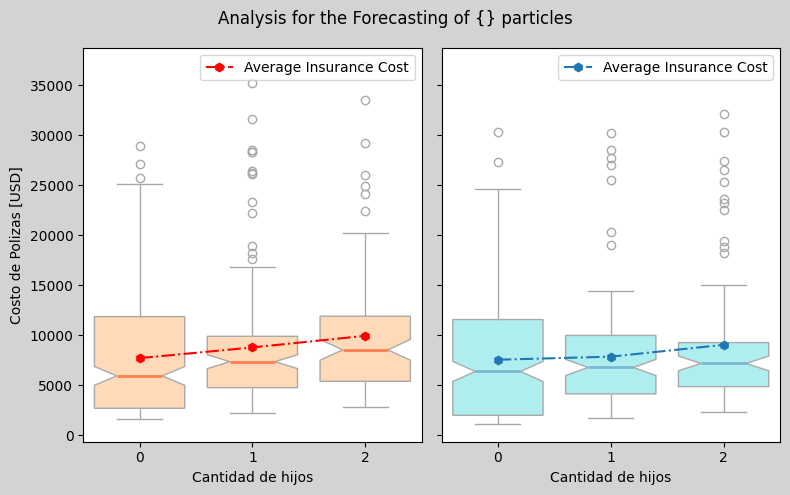

In [8]:
fig, ax = plt.subplots(1,2, figsize=(8,5), facecolor='lightgray', sharey=True)

PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'red'},
    'medianprops':{'color':'green'},
    'whiskerprops':{'color':'blue'},
    'capprops':{'color':'magenta'}
}

plt.suptitle('Analysis for the Forecasting of {} particles')
ax1 = plt.subplot(1,2,1)
sns.boxplot(df[(df['Género']=='female') & (df['Fumador']=='no')], x='Cantidad de hijos', y='Costo Póliza', ax=ax1, notch=True, linecolor="darkgray",
            boxprops={"facecolor": 'peachpuff'},
            medianprops={"color": "coral", "linewidth": 2})
df[(df['Género']=='female') & (df['Fumador']=='no')].groupby('Cantidad de hijos')['Costo Póliza'].mean().plot(ax=ax1, marker='h', linestyle='-.', 
                                                                                                              color='r', label='Average Insurance Cost')
ax1.legend(loc="upper right")
ax1.set_ylabel('Costo de Polizas [USD]')
ax1.set_xlim([-.5, 2.5])

plt.suptitle('Analysis for the Forecasting of {} particles')
ax2 = plt.subplot(1,2,2)
sns.boxplot(df[(df['Género']=='male') & (df['Fumador']=='no')], x='Cantidad de hijos', y='Costo Póliza', ax=ax2, notch=True,linecolor="darkgray",
            boxprops={"facecolor": 'paleturquoise'},
            medianprops={"color": (.3, .5, .7, .5), "linewidth": 2})
df[(df['Género']=='male') & (df['Fumador']=='no')].groupby('Cantidad de hijos')['Costo Póliza'].mean().plot(ax=ax2, marker='h', linestyle='-.',
                                                                                                           label='Average Insurance Cost')
ax2.legend(loc="upper right")
ax2.set_xlim([-.5, 2.5])
fig.tight_layout()

### Analyzing how Smoking affects Insurances Costs

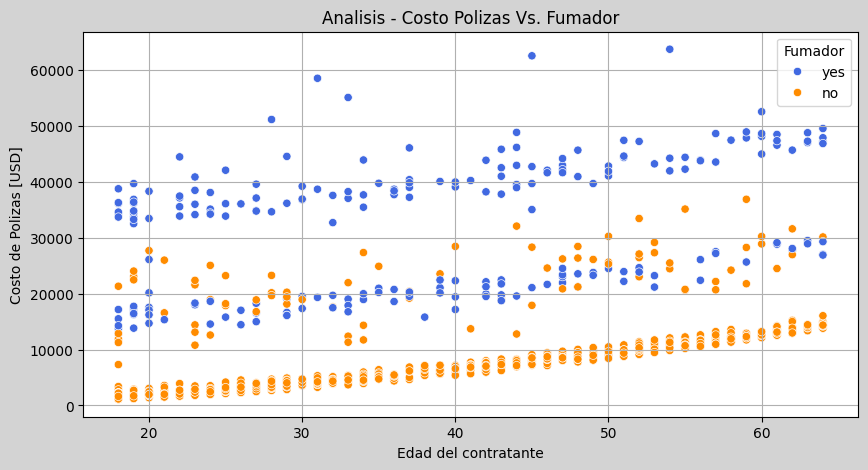

In [9]:

fig, ax = plt.subplots(1,1, figsize=(10,5), facecolor='lightgray')
sns.scatterplot(data=df, x='Edad del contratante', y='Costo Póliza', hue="Fumador", ax=ax, palette=['royalblue', 'darkorange'])
ax.grid()
ax.set_ylabel('Costo de Polizas [USD]')
ax.set_title('Analisis - Costo Polizas Vs. Fumador');

<Axes: xlabel='Edad del contratante', ylabel='Costo Póliza'>

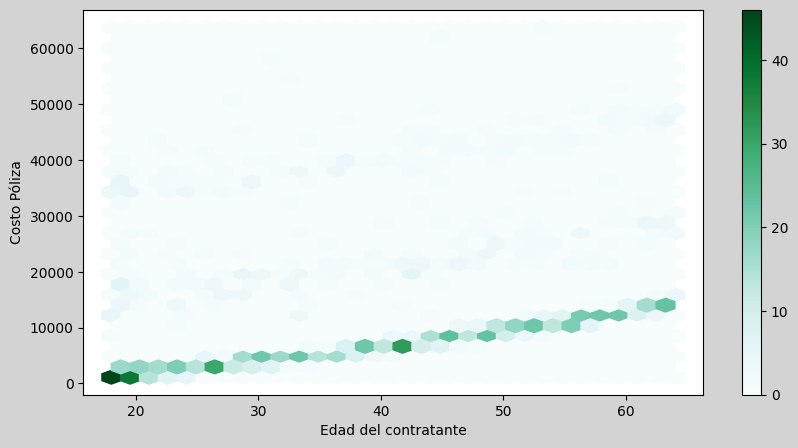

In [14]:
fig, ax = plt.subplots(1,1, figsize=(10,5), facecolor='lightgray')
df.plot.hexbin(x='Edad del contratante', y='Costo Póliza', gridsize=30, alpha=1, ax=ax)

## Statistical Inference Analysis

### ***(PASO 2. Validar supuestos)***

### 1.- Es el monto promedio que una persona paga por su póliza de seguros menor a $9480 dólares?

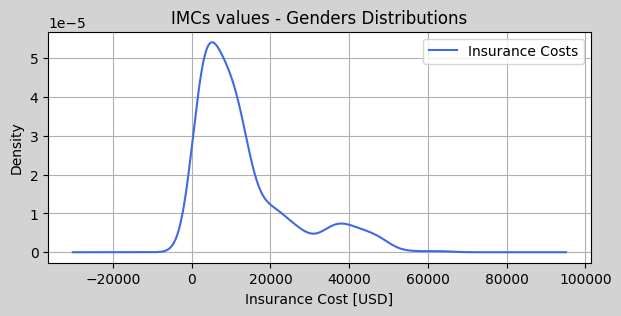

In [10]:
fig, ax = plt.subplots(1,1, figsize=(7,3), facecolor='lightgray')
df['Costo Póliza'].plot.kde(label='Insurance Costs', ax=ax, color='royalblue')
ax.set_title('IMCs values - Genders Distributions')
ax.set_xlabel('Insurance Cost [USD]')
plt.legend()
plt.grid()

In [11]:
df_stats = df[['Costo Póliza']].describe().transpose()
display(df_stats)

,count,mean,std,min,25%,50%,75%,max
Costo Póliza,1138.0,13040.970971,12191.322806,1121.8739,4349.7251,9159.350325,16281.59625,63770.42801


#### Hypothesis:

***Ho***:   $\mu_{0}$ = 9480

***H1***:   $\mu_{0}$ < 9480

#### Population

As presented in the previous Section, Insurance Costs behave like a Gaussian process with an unknown std. However, as seen in the last Figure, the data is composed of different kinds of insurance behaviours, for example, the smokers and non-smokers cases. Nonetheless, all of them behave like Gaussian processes. Therefore, those can be added to maintain the Gaussian characteristics of a process, which is the behaviour presented in the last Figure. 

#### Data Modelling for the Analysis

Since the std for the process is unknown, the statistical inference analysis needs to be implemented using a t-student distribution, however, given that the number of samples provided is greater than 30, it is possible to model the data as a normal process for the analysis.

#### Statistical Critical Point

Since the process is not in a critical field where a lot of precision is needed, and since the consequences of having *Errors 1 or 2* cases won't cost lives a *significance level* ($\alpha$) of ***0.05*** is used. Thus, given that the data is being modelled as a normal process and having a significance level of 0.05, a *critical point* of ***-1.64*** will be used to accept or reject the presented **Ho**. This value is selected because we are interested in determining insurance costs below 9480 USD, therefore, we need to implement the statistical inference analysis on the left tail of the cumulative normal distribution.

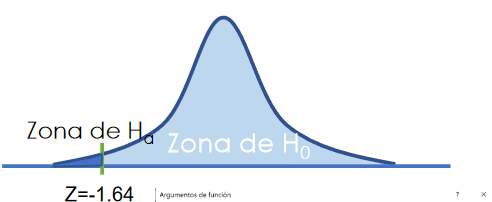


- ***Calculating the Critical Value:***  

In [12]:
alpha = 0.05
Critical_Value = norm.isf(alpha)
print('Critical Value: ', -Critical_Value)

Critical Value:  -1.6448536269514729


#### Implementing the Statistical Inference Analysis

- ***Calculating *Z* :***

In [13]:
Z = (df_stats['mean'][0] - 9480) / np.sqrt((df_stats['std'][0]**2)/df.shape[0])
print('Z: ', Z)

Z:  9.853459446924205


- ***Calculating the *p-value*:***

In [14]:
p_value = norm(0, 1).cdf(Z)
print('p-value: ', p_value)

p-value:  1.0


#### Conclusion

It can be concluded that, since the obtained p-value is 1 and the selected $\alpha$ for the test is 0.05, the selected ***H0*** can not be rejected, meaning that the average insurance cost is not less than 9480 USD.

****

### 2.-Basándote en el índice de masa corporal, detectar si las mujeres cuidan más de su salud

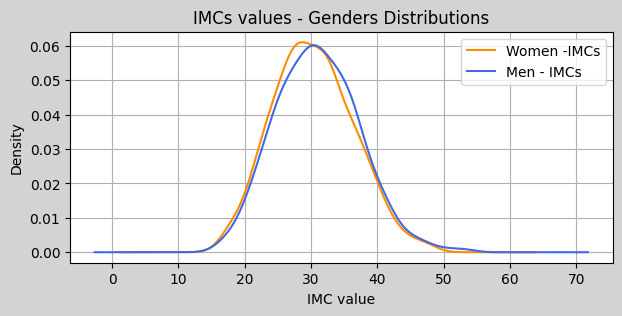

In [15]:
fig, ax = plt.subplots(1,1, figsize=(7,3), facecolor='lightgray')
df[df['Género']=='female']['Indice de masa corporal'].plot.kde(label='Women -IMCs', ax=ax, color='darkorange')
df[df['Género']=='male']['Indice de masa corporal'].plot.kde(label='Men - IMCs', ax=ax, color='royalblue')
ax.set_xlabel('IMC value')
ax.set_title('IMCs values - Genders Distributions')
plt.grid()
plt.legend()

In [16]:
df_stats = df.groupby('Género')[['Indice de masa corporal']].describe()
df_stats.reset_index().set_index("Género", inplace = True)
df_stats.columns = [col[1] for col in df_stats.columns]
display(df_stats)

,count,mean,std,min,25%,50%,75%,max
Género,,,,,,,,
female,566.0,30.335910,6.055825,16.815,26.05375,29.9725,34.4375,48.07
male,572.0,30.983199,6.241235,15.960,26.40750,30.7450,35.2450,53.13


#### Hypothesis:

In this case the null hypothesis *Ho* is based on the descriptive analysis implemented in the previous section, where it can be observed that most of the IMC values for both genders are related to categories other than underweight. Hence, it is assumed that the IMC average values can give us a good estimator of the population health since most of them are related to categories with IMC values above 18.4, as a result, the lower the mean value is for the IMC populations of both genders:

***Ho***:   $\mu_{Female}$ - $\mu_{Male}$ = 0

***H1***:   $\mu_{Female}$ - $\mu_{Male}$ < 0

#### Populations

In the last presented Figure, it can be seen that both populations of IMC values, for male and female populations, behave like Gaussian processes.

#### Data Modelling for the Analysis

Both populations of IMC values behave as normal processes, as presented in the previous Figure. Nonetheless, since their $\sigma$'s values are unknown, both will be modelled as t-student processes for this analysis.

#### Statistical Critical Point

As in the previously implemented statistical inference analysis, the precision needed is not too high, since the consequences of having *Errors 1 or 2* cases won't cost lives. Thus, a *significance level* ($\alpha$) of ***0.05*** is used. As a result, by modelling the populations as t-student distributions,  a *critical point* of ***-1.6462*** will be used to accept or reject the presented **Ho**. This value is selected because we are interested in determining if the mean for the female population is smaller than the mean for the male population, therefore, we need to implement the statistical inference analysis on the left tail of the cumulative normal distribution.

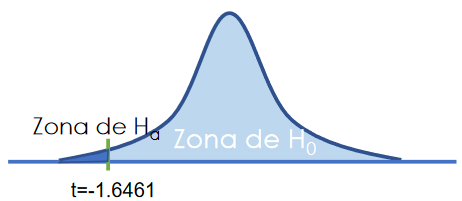

- ***Calculating the *t-student* Critical value:***

In [17]:
alpha = 0.05
critical_val = t.isf(alpha, 1135)
print('Critical Value: ', -critical_val)

Critical Value:  -1.6461972579568456


#### Implementing the Statistical Inference Analysis

- ***Calculating the *t-student* Statistics value:***

In [18]:
# Degrees of Freedom:
numerador = (df_stats.loc['female', 'std']**2/df_stats.loc['female', 'count'] + df_stats.loc['male', 'std']**2/df_stats.loc['male', 'count'])**2
denominador = (1/(df_stats.loc['female', 'count']-1)) * (df_stats.loc['female', 'std']**2/df_stats.loc['female', 'count'])**2 + (1/(df_stats.loc['male', 'count']-1))* (df_stats.loc['male', 'std']**2/df_stats.loc['male', 'count'])**2
DoF = math.floor(numerador / denominador)

# t-student Statistics value
t_stat = round(((df_stats.loc['female', 'mean'] - df_stats.loc['male', 'mean']) - 0) / math.sqrt(df_stats.loc['female', 'std']**2/df_stats.loc['female', 'count'] + df_stats.loc['male', 'std']**2/df_stats.loc['male', 'count']), 2)

print('DegreeS of Freedom: ', DoF, ';  t: ', t_stat)

DegreeS of Freedom:  1135 ;  t:  -1.78


- ***Calculating the *p-value*:***

In [19]:
p_value = t.sf(-t_stat, DoF)
print('p-value: ', p_value)

p-value:  0.03767171937196802


#### Conclusion

It can be concluded that, since the obtained p-value is .0376 and the selected $\alpha$ value is 0.05, the null hypothesis can be rejected. Thus, it has been proved that, for an $\alpha$ of 0.05, the female population is healthier than the male population, based on their IMCs.

****

### 3.- El costo de la póliza aumenta conforme la cantidad de hijos del contratante?

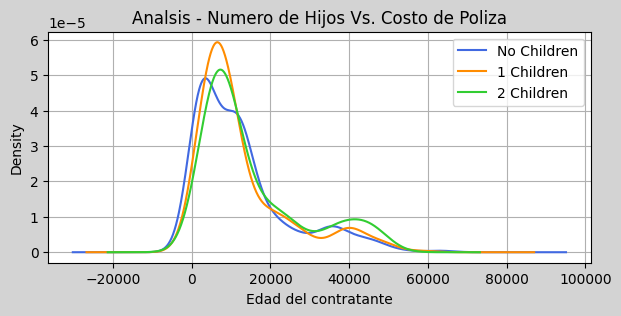

In [20]:
fig, ax = plt.subplots(1,1, figsize=(7,3), facecolor='lightgray')
#sns.scatterplot(data=df, x='Edad del contratante', y='Costo Póliza', hue="Cantidad de hijos", style='Cantidad de hijos', ax=ax, palette=['royalblue', 'darkorange', 'red'])
df[df['Cantidad de hijos']==0]['Costo Póliza'].plot.kde(label='No Children', ax=ax, color='royalblue')
df[df['Cantidad de hijos']==1]['Costo Póliza'].plot.kde(label='1 Children', ax=ax, color='darkorange')
df[df['Cantidad de hijos']==2]['Costo Póliza'].plot.kde(label='2 Children', ax=ax, color='limegreen')
ax.set_xlabel('Edad del contratante')
ax.set_title('Analsis - Numero de Hijos Vs. Costo de Poliza')
plt.grid()
plt.legend()

In [21]:
df_stats = df.groupby('Cantidad de hijos')['Costo Póliza'].agg(['sum','count', 'mean', 'var', 'std'])
df_stats.reset_index().set_index("Cantidad de hijos", inplace = True)
df_stats.index.name = None
df_stats = df_stats.transpose()
df_stats.rename(columns = {0:'Hijos_0', 1:'Hijos_1', 2:'Hijos_2'}, inplace=True)
display(df_stats)

,Hijos_0,Hijos_1,Hijos_2
sum,7.098070e+06,4.124900e+06,3.617655e+06
count,5.740000e+02,3.240000e+02,2.400000e+02
mean,1.236598e+04,1.273117e+04,1.507356e+04
var,1.445596e+08,1.397983e+08,1.661874e+08
std,1.202329e+04,1.182363e+04,1.289137e+04


#### Hypothesis

For this case, the null hypothesis is about validating that the costs of insurance are affected by the number of children of the customers hiring the service. Hence, the alternative hypothesis is that insurance costs vary depending on the customers' number of children:

***Ho***:   $\mu_{0}$ = $\mu_{1}$ = $\mu_{2}$

***H1***:   $\mu_{2}$ $\neq$$\mu_{0}$ $\neq$ $\mu_{1}$ $\neq$ $\mu_{2}$ $\neq$ $\mu_{0}$

#### Populations

The last Figure presents the distribution of insurance costs related to the customers' number of children. It can be seen that they behave like Gaussian processes.

#### Data Modelling for the Analysis

Populations related to the cases of interest, the number of children of customers hiring insurance, behave like Gaussian processes. Nevertheless, since their $\sigma$'s are unknown but similar, as presented in the previous Figure, the Fisher's Least Significant Difference (LSD) is used to implement an Analysis of Variance (ANOVA) test, aiming to determine differences among the three populations of interest.

#### Statistical Critical Point

For this statistical inference analysis a significance level of 0.05 is used, $\alpha = 0.05$, which gave a *critical value* of ***3.003*** for the Fisher distribution. Thus, the rejected area, following the characteristics of the Fisher distribution, is presented next:

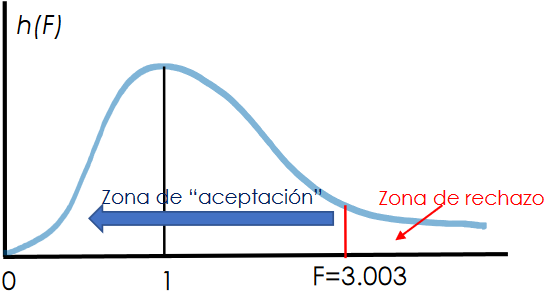

- ***Calculating the Critical Value:***

In [22]:
alpha = 0.05
Critical_Value = f.isf(alpha,  2, 1135)
print('Critical Value: ', Critical_Value)

Critical Value:  3.0036531758998706


#### Implementing the Statistical Inference Analysis

- ***Calculating the *F-Distribution* statistical value:***

In [23]:
# Determining the sum of insurance costs for all cases, the total number of cases and the degrees of freedom,and the general sample mean
k = len(df_stats.columns)
sumTotal = df_stats.iloc[0].sum()
nTotal = df_stats.iloc[1].sum()
mmg = sumTotal / nTotal

# Calculating CMRT
sctr = 0
for col in df_stats.columns:
  sctr += df_stats[col]['count'] * (df_stats[col]['mean'] - mmg) ** 2 
CMTR = sctr / (k - 1)

# Calculating SME
SCE = 0
for col in df_stats.columns:
  SCE += (df_stats[col]['count'] - 1) * df_stats[col]['var']
CME = SCE / (nTotal - 5)

# F-statistic value
F = round(CMTR / CME, 2)
print("F:", F)

F: 4.34


- ***Calculating the *p-value*:***

In [24]:
p_value = f.sf(F, k - 1, nTotal - k)
print("p-value:", p_value)

p-value: 0.013253562638698318


- ***ANOVA Summary***

In [25]:
ANOVA = pd.DataFrame({
    "Fuente de Variación": pd.Series(["Tratamientos", "Error", "Total"], index=[0, 1, 2]),
    "Suma de Cuadrados": pd.Series([sctr, SCE, sctr + SCE], index=[0, 1, 2]),
    "Grados de Libertad": pd.Series([k, nTotal - k, nTotal - 1], index=[0, 1, 2]),
    "Cuadrado Medio": pd.Series([CMTR, SCE], index=[0, 1]),
    "F": pd.Series([F], index=[0]),
    "Valor-p": pd.Series([p_value], index=[0])
})
ANOVA

,Fuente de Variación,Suma de Cuadrados,Grados de Libertad,Cuadrado Medio,F,Valor-p
0,Tratamientos,1.284165e+09,3.0,6.420826e+08,4.34,0.013254
1,Error,1.677063e+11,1135.0,1.677063e+11,NaN,NaN
2,Total,1.689904e+11,1137.0,NaN,NaN,NaN


#### Conclusion

The previously implemented statistical inference analysis shows that the defined ***H0*** can be rejected, since the obtained *p-value* is smaller than the defined $\alpha$. As a result, it can be concluded that insurance costs are affected by the customers' number of children. This can also be justified by comparing the calculated Critical Value against the found F-statistic, where the latter is greater than the critical value, meaning ***H0*** can be rejected.

****

### 4.-Determinar si existe relación entre el género del contratante y la cantidad de hijos

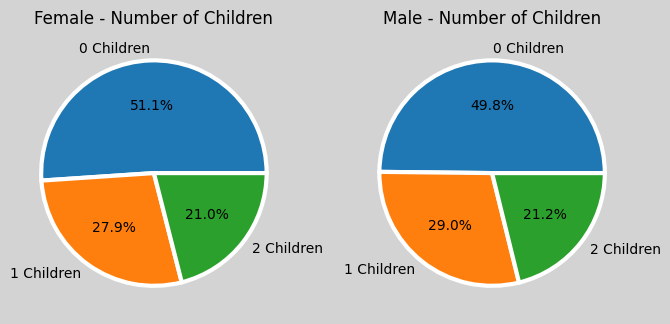

In [26]:
fig, ax = plt.subplots(1,2, figsize=(8,5), facecolor='lightgray')
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
for gen, axs in zip(df['Género'].unique().tolist(), [ax1, ax2]):
    labels = (df[df['Género']==gen]['Cantidad de hijos'].value_counts()/ df[df['Género']==gen].shape[0]).index.tolist()
    labels = ['{} Children'.format(c) for c in labels]
    values = (df[df['Género']==gen]['Cantidad de hijos'].value_counts()/ df[df['Género']==gen].shape[0]).values
    axs.pie(values, labels=labels, autopct='%.1f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, textprops={'fontsize':10})
    axs.set_title('{} - Number of Children'.format(gen.capitalize()))

In [27]:
df_stats = df.groupby(['Cantidad de hijos', 'Género'])['Cantidad de hijos'].agg(['count'])
display(df_stats)

count
Cantidad de hijos Género       
0                 female    289
                  male      285
1                 female    158
                  male      166
2                 female    119
                  male      121

#### Hypothesis

This statistical inference analysis is used to determine if the number of children of insurance customers is related to the customers' genders. As can be seen in the previous Figure and Table, they behave similarly, but that is not enough to rule out independence. Thus, the null hypothesis will be about the number of children of customers to have no relationship with the customers' genders, while the alternative hypothesis will be about having some dependency between them, as presented next:

***Ho***:   The number of ***Customer's Children*** is independent of the ***Customers Genders***

***H1***:   The number of ***Customer's Children*** is not independent of the ***Customers Genders***

#### Populations

The population can be represented as a multinomial distribution, due to the nature of the processes to analyze, which are binomial processes related to the sex and number of customers' children.

#### Data Modelling for the Analysis

The test will be implemented by modelling the processes using the $\chi^{2}$ distribution since the population behaves like multinomial processes and their frequencies are equal or greater than 5, the $\chi^{2}$ distribution can determine independence between the processes of interest.

#### Statistical Critical Point

For this statistical inference analysis a significance level of 0.05 is used, $\alpha = 0.05$, which gave a *critical value* of ***5.99*** for the $\chi^{2}$ distribution. Thus, the rejected area, following the characteristics of the $\chi^{2}$ distribution, is presented next:

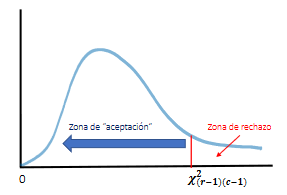

- ***Calculating the Critical Value:***

In [28]:
chi2.isf(0.05, 2)

5.991464547107983

#### Implementing the Statistical Inference Analysis

- ***Calculating the $\chi^{2}$ contingency table:***

In [29]:
# Creating the table of contingency
dict_Child = {}
for child in df['Cantidad de hijos'].unique():
    colvals = (df[df['Cantidad de hijos']==child]['Género'].value_counts().loc[['female', 'male']].tolist())
    colvals.append(sum(colvals))
    dict_Child['{}_Hijos'.format(child)] = colvals

df_stats = pd.DataFrame(dict_Child, index = ['Female', 'Male', 'Total'])
df_stats['Total'] = df_stats.sum(axis=1).values
df_stats.index.name = 'Gender' 
display(df_stats)

,0_Hijos,1_Hijos,2_Hijos,Total
Gender,,,,
Female,289,158,119,566
Male,285,166,121,572
Total,574,324,240,1138


- ***Calculating the $\chi^{2}$ statistic value***

In [30]:
# Calculating the Chi2 statistics
chi2 = chi2_contingency(df_stats.iloc[0:2][df_stats.columns[:3]])

print('Chi2 statistics value: ', chi2.statistic)

Chi2 statistics value:  0.21044349889493905


- ***Calculating the p-value:***

In [31]:
p_value = chi2.pvalue
print("p-value:", p_value, 1-p_value)

p-value: 0.9001248982549495 0.09987510174505054


#### Conclusion

It can be concluded, based on the obtained statistics, that ***H0*** cannot be rejected, since the selected significance level, $\alpha$ = 0.05, is smaller than the obtained ***p-value*** for the inference test. Hence, there exist dependencies between the gender of the insurance customers and the amount of children they are having.

****

### 5.-Determinar si existe relación entre el costo de la póliza y si el contratante es fumador o no

#### ***(PASO 3. Realizar un análisis adicional)***

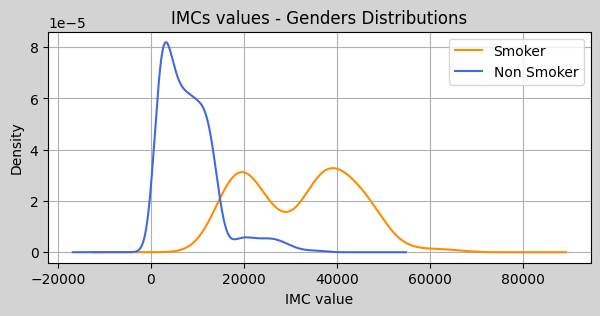

In [32]:
fig, ax = plt.subplots(1,1, figsize=(7,3), facecolor='lightgray')
df[df['Fumador']=='yes']['Costo Póliza'].plot.kde(label='Smoker', ax=ax, color='darkorange')
df[df['Fumador']=='no']['Costo Póliza'].plot.kde(label='Non Smoker', ax=ax, color='royalblue')
ax.set_xlabel('IMC value')
ax.set_title('IMCs values - Genders Distributions')
plt.grid()
plt.legend()

In [33]:
df_stats = df.groupby('Fumador')[['Costo Póliza']].describe()
df_stats.reset_index().set_index("Fumador", inplace = True)
df_stats.columns = [col[1] for col in df_stats.columns]
display(df_stats)

,count,mean,std,min,25%,50%,75%,max
Fumador,,,,,,,,
no,907.0,8195.979305,6058.174978,1121.8739,3477.870300,7152.67140,11296.236625,36910.60803
yes,231.0,32064.379808,11581.734983,12829.4551,20878.860675,34617.84065,41065.691575,63770.42801


#### Hypothesis

For this case, it needs to be proved that a relationship exists between smoking conditions on the insurance customers and the cost of their policies. Therefore, the null hypothesis, ***H0***, is that the smoking conditions of the clients do not affect insurance costs, while the alternative hypothesis is that a relationship exists, such as:

***Ho***:   $\mu_{smokers}$ - $\mu_{non_smokers}$ = 0

***H1***:   $\mu_{smokers}$ - $\mu_{non_smokers}$ > 0

#### Populations

The populations of insured clients that are smokers and non-smokers can be modelled as normal processes, as can be seen in the previous Figure. 

#### Data Modelling for the Analysis

Since the $\sigma$'s for the mentioned populations are unknown, the t-student distribution will be used to model the data

#### Statistical Critical Point

For this statistical inference analysis a significance level of 0.05 is used, $\alpha = 0.05$, which gave a *critical value* of ***1.646*** for the ***t-student*** distribution. Thus, the rejected area is presented next:

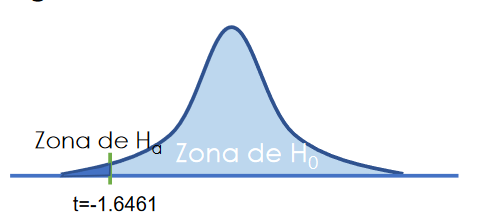

- ***Calculating the Critical Value:***

In [34]:
alpha = 0.05
critical_val = t.isf(alpha, 1135)
print('Critical Value: ', -critical_val)

Critical Value:  -1.6461972579568456


#### Implementing the Statistical Inference Analysis

- ***Calculating the *t-student* Statistics value:***

In [35]:
# Degrees of Freedom:
numerador = (df_stats.loc['no', 'std']**2/df_stats.loc['no', 'count'] + df_stats.loc['yes', 'std']**2/df_stats.loc['yes', 'count'])**2
denominador = (1/(df_stats.loc['no', 'count']-1)) * (df_stats.loc['no', 'std']**2/df_stats.loc['no', 'count'])**2 + (1/(df_stats.loc['yes', 'count']-1))* (df_stats.loc['yes', 'std']**2/df_stats.loc['yes', 'count'])**2
DoF = math.floor(numerador / denominador)

# t-student Statistics value
t_stat = round(((df_stats.loc['no', 'mean'] - df_stats.loc['yes', 'mean']) - 0) / math.sqrt(df_stats.loc['no', 'std']**2/df_stats.loc['no', 'count'] + df_stats.loc['yes', 'std']**2/df_stats.loc['yes', 'count']), 2)

print('DegreeS of Freedom: ', DoF, ';  t: ', t_stat)

DegreeS of Freedom:  262 ;  t:  -30.29


- ***Calculating the p-value:***

In [36]:
p_value = t.sf(-t_stat, DoF)
print('p-value: ', p_value)

p-value:  7.099512809324614e-88


#### Conclusion

Based on the obtained p-value close to 0, and the selected significance level of 0.05, it can be concluded that smoking conditions affect insurance costs. This can also be observed in the presented Figures, where the mean value of insurance costs for smokers and non-smokers differs., being smaller for the latter case. Thus, ***H0*** can be rejected.

****

## Conclusions

Statistical inference can be used to find behaviours not easily observable within the data being analyzed; trends that can be used to determine the best actions to take under specific circumstances. For example, in this implemented exercise, statistical inference was used to support the generation of savings when hiring car insurance, to understand what conditions or situations increase insurance prices. Nonetheless, even when statistical inference is a great support to take decisions, this needs to be complemented with descriptive statistics, to increase certainty when defining the null and alternative hypothesis, which is the base for any statistical inference test.


# FIN